In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.stats import ncx2
from scipy.stats import norm as Gauss
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [12]:
# Parameter
xname = r"$\tau_\mathrm{reio}$"
xname_hat = r"$\hat{\tau}_\mathrm{reio}$"
xname_true = r"$\tau_\mathrm{reio, true}$"
x_true = 0.0543

# Data 
x_hat = np.array([5.559656e-02 , 5.489429e-02 , 5.454959e-02 , 5.455234e-02 , 5.325707e-02 , 5.418791e-02 , 5.382468e-02 , 5.542658e-02 , 5.335546e-02 , 5.350746e-02 , 5.472141e-02 , 5.491662e-02 , 5.331248e-02 , 5.402484e-02 , 5.360029e-02 , 5.597876e-02 , 5.543823e-02 , 5.505870e-02 , 5.312552e-02 , 5.412485e-02 , 5.490754e-02 , 5.457920e-02 , 5.455374e-02 , 5.298344e-02 , 5.441794e-02 , 5.340669e-02 , 5.447903e-02 , 5.465286e-02 , 5.531140e-02 , 5.415342e-02 , 5.306549e-02 , 5.388632e-02 , 5.299273e-02 , 5.454847e-02 , 5.476781e-02 , 5.493495e-02 , 5.363537e-02 , 5.382905e-02 , 5.408901e-02 , 5.486335e-02 , 5.483226e-02 , 5.423678e-02 , 5.265494e-02 , 5.301563e-02 , 5.517078e-02 , 5.579900e-02 , 5.333276e-02 , 5.490560e-02 , 5.390391e-02 , 5.305010e-02 , 5.580344e-02 , 5.328998e-02 , 5.415192e-02 , 5.400389e-02 , 5.370823e-02 , 5.476960e-02 , 5.410259e-02 , 5.467991e-02 , 5.434470e-02 , 5.361195e-02 , 5.501257e-02 , 5.541212e-02 , 5.606767e-02 , 5.357358e-02 , 5.414796e-02 , 5.364253e-02 , 5.527947e-02 , 5.524019e-02 , 5.460698e-02 , 5.488375e-02 , 5.388719e-02 , 5.451892e-02 , 5.389121e-02 , 5.437962e-02 , 5.404035e-02 , 5.365284e-02 , 5.363461e-02 , 5.445381e-02 , 5.376351e-02 , 5.424746e-02 , 5.528610e-02 , 5.337973e-02 , 5.349957e-02 , 5.373519e-02 , 5.427851e-02 , 5.436355e-02 , 5.531817e-02 , 5.533783e-02 , 5.541444e-02 , 5.305130e-02 , 5.450221e-02 , 5.500609e-02 , 5.539716e-02 , 5.531056e-02 , 5.457580e-02 , 5.462303e-02 , 5.484973e-02 , 5.315418e-02 , 5.447921e-02 , 5.289709e-02 , 5.451397e-02 , 5.475717e-02 , 5.382223e-02 , 5.522455e-02 , 5.414995e-02 , 5.567045e-02 , 5.311230e-02 , 5.414270e-02 , 5.477718e-02 , 5.378629e-02 , 5.465584e-02 , 5.373143e-02 , 5.352773e-02 , 5.273910e-02 , 5.340670e-02 , 5.531848e-02 , 5.448885e-02 , 5.500773e-02 , 5.434198e-02 , 5.458906e-02 , 5.389362e-02 , 5.521445e-02 , 5.477215e-02 , 5.477853e-02 , 5.603192e-02 , 5.478024e-02 , 5.440671e-02 , 5.323531e-02 , 5.441996e-02 , 5.481129e-02 , 5.385622e-02 , 5.463083e-02 , 5.481610e-02 , 5.406865e-02 , 5.548614e-02 , 5.501413e-02 , 5.236511e-02 , 5.431734e-02 , 5.467719e-02 , 5.543198e-02 , 5.403193e-02 , 5.490472e-02 , 5.402471e-02 , 5.376010e-02 , 5.380903e-02 , 5.477942e-02 , 5.463435e-02 , 5.422074e-02 , 5.356797e-02 , 5.573970e-02 , 5.498383e-02 , 5.449641e-02 , 5.495353e-02 , 5.340667e-02 , 5.576283e-02 , 5.460680e-02 , 5.453446e-02 , 5.412345e-02 , 5.352357e-02 , 5.398006e-02 , 5.515103e-02 , 5.464385e-02 , 5.440079e-02 , 5.401132e-02 , 5.524126e-02 , 5.439736e-02 , 5.472507e-02 , 5.372293e-02 , 5.350156e-02 , 5.495539e-02 , 5.282993e-02 , 5.482386e-02 , 5.421815e-02 , 5.373106e-02 , 5.416207e-02 , 5.373316e-02 , 5.365769e-02 , 5.385240e-02 , 5.320505e-02 , 5.430547e-02 , 5.412392e-02 , 5.583688e-02 , 5.367816e-02 , 5.455299e-02 , 5.281241e-02 , 5.470056e-02 , 5.369743e-02 , 5.441542e-02 , 5.265459e-02 , 5.464648e-02 , 5.375259e-02 , 5.451161e-02 , 5.341399e-02 , 5.528707e-02 , 5.451425e-02 , 5.422737e-02 , 5.392931e-02 , 5.548177e-02 , 5.493677e-02 , 5.537337e-02 , 5.217148e-02 , 5.615754e-02 , 5.478004e-02 , 5.451876e-02 , 5.482597e-02 , 5.486681e-02 , 5.323417e-02 , 5.422050e-02 , 5.439402e-02 , 5.304475e-02 , 5.422533e-02 , 5.500089e-02 , 5.457474e-02 , 5.306813e-02 , 5.497735e-02 , 5.320255e-02 , 5.418987e-02 , 5.413194e-02 , 5.412726e-02 , 5.459426e-02 , 5.311929e-02 , 5.484786e-02 , 5.554837e-02 , 5.524476e-02 , 5.359288e-02 , 5.352815e-02 , 5.326171e-02 , 5.397946e-02 , 5.367357e-02 , 5.452261e-02 , 5.445871e-02 , 5.438532e-02 , 5.446565e-02 , 5.382558e-02 , 5.555280e-02 , 5.415592e-02 , 5.520181e-02 , 5.531786e-02 , 5.291833e-02 , 5.326643e-02 , 5.541841e-02 , 5.466650e-02 , 5.412558e-02 , 5.285074e-02 , 5.479334e-02 , 5.447389e-02 , 5.508079e-02 , 5.376895e-02 , 5.377731e-02 , 5.438722e-02])
lnL_hat = -np.array([337.89, 302.78, 284.32, 348.51, 307.72, 298.40, 291.66, 302.37, 300.94, 334.14, 305.67, 330.99, 307.68, 335.89, 310.88, 325.24, 293.63, 282.39, 314.18, 300.47, 318.37, 302.34, 275.38, 323.06, 331.11, 339.51, 306.89, 301.02, 291.21, 301.94, 307.28, 307.56, 301.48, 281.85, 304.66, 300.50, 292.62, 285.91, 310.54, 317.32, 306.82, 322.50, 292.73, 299.03, 304.65, 305.37, 329.75, 312.37, 301.41, 308.63, 304.27, 330.87, 283.70, 284.78, 298.46, 304.50, 288.58, 298.01, 312.29, 315.21, 316.27, 306.90, 326.67, 302.26, 290.01, 309.47, 293.19, 287.21, 307.79, 286.45, 312.90, 295.97, 316.38, 312.96, 308.27, 314.97, 297.95, 290.46, 320.86, 270.80, 305.63, 268.56, 308.21, 293.69, 334.45, 323.36, 310.18, 282.05, 323.38, 298.85, 334.20, 321.31, 301.20, 294.68, 309.38, 298.50, 270.28, 299.56, 319.02, 293.38, 300.90, 296.77, 315.32, 316.98, 307.51, 297.37, 319.44, 337.25, 293.92, 292.19, 287.36, 294.85, 286.49, 305.14, 291.60, 295.43, 315.52, 308.77, 333.46, 290.81, 315.41, 275.38, 333.50, 299.34, 338.38, 298.40, 284.56, 299.26, 302.43, 329.74, 310.90, 294.54, 309.71, 262.82, 315.87, 296.55, 286.80, 286.43, 311.48, 308.70, 304.42, 296.32, 303.99, 282.19, 311.45, 285.72, 293.05, 301.00, 310.86, 354.26, 308.19, 305.90, 291.66, 260.15, 296.03, 301.13, 277.18, 297.48, 271.17, 304.60, 315.00, 308.32, 313.29, 345.18, 296.04, 284.51, 291.03, 310.50, 334.09, 276.25, 316.01, 312.91, 286.30, 273.27, 303.54, 320.98, 322.80, 322.46, 274.86, 329.85, 259.31, 304.11, 317.61, 300.86, 316.83, 290.92, 275.87, 300.77, 289.61, 332.56, 310.83, 325.94, 340.27, 297.24, 319.55, 324.75, 342.85, 297.28, 280.08, 279.37, 338.25, 289.82, 310.30, 326.99, 314.97, 314.30, 296.19, 344.64, 267.48, 301.13, 310.31, 297.90, 308.16, 307.75, 308.28, 344.38, 304.82, 308.65, 300.12, 306.15, 284.36, 279.63, 305.51, 321.68, 315.39, 281.69, 314.51, 313.89, 309.98, 320.43, 301.00, 318.23, 311.98, 292.14, 305.95, 293.63, 299.58, 321.54, 314.33, 310.56, 304.59, 297.35, 314.44, 290.36, 303.53, 299.31, 296.84, 315.48, 297.29, 321.59])
lnL_tru = -np.array([339.32, 303.05, 284.36, 348.57, 308.61, 298.42, 291.89, 303.42, 301.68, 334.67, 305.84, 331.29, 308.55, 335.95, 311.30, 327.54, 294.77, 282.85, 315.29, 300.50, 318.66, 302.42, 275.45, 324.47, 331.12, 340.12, 306.92, 301.12, 292.05, 301.96, 308.64, 307.71, 302.87, 281.90, 304.85, 300.85, 293.02, 286.08, 310.59, 317.58, 307.05, 322.50, 294.96, 300.39, 305.27, 307.18, 330.56, 312.68, 301.55, 309.94, 306.19, 331.74, 283.73, 284.86, 298.75, 304.70, 288.61, 298.14, 312.29, 315.58, 316.74, 307.93, 329.23, 302.69, 290.04, 309.83, 293.97, 287.91, 307.87, 286.73, 313.02, 296.01, 316.52, 312.97, 308.32, 315.32, 298.34, 290.48, 321.09, 270.81, 306.46, 269.29, 308.72, 293.96, 334.46, 323.37, 311.02, 282.92, 324.43, 300.16, 334.24, 321.71, 302.22, 295.50, 309.44, 298.59, 270.52, 300.58, 319.04, 295.03, 300.94, 296.94, 315.52, 317.71, 307.53, 298.91, 320.61, 337.27, 294.13, 292.42, 287.47, 295.11, 287.00, 307.15, 292.27, 296.27, 315.55, 309.17, 333.47, 290.89, 315.55, 276.04, 333.69, 299.51, 340.92, 298.59, 284.57, 300.13, 302.44, 329.98, 311.05, 294.63, 309.93, 262.87, 317.06, 296.98, 289.88, 286.43, 311.60, 309.75, 304.49, 296.62, 304.05, 282.43, 311.64, 285.89, 293.14, 301.01, 311.27, 356.00, 308.58, 305.94, 292.00, 260.87, 297.85, 301.21, 277.21, 297.51, 271.67, 304.68, 315.61, 308.42, 313.31, 345.24, 296.77, 284.51, 291.19, 310.78, 334.64, 276.63, 317.86, 313.13, 286.30, 273.55, 303.55, 321.26, 323.18, 322.64, 275.89, 329.85, 259.33, 306.00, 317.91, 300.92, 318.63, 291.06, 276.17, 300.79, 291.89, 332.65, 311.09, 325.98, 340.92, 298.06, 319.59, 324.76, 342.97, 298.44, 280.42, 280.38, 341.99, 292.59, 310.48, 327.03, 315.18, 314.58, 297.10, 344.65, 267.49, 302.45, 310.32, 298.31, 308.22, 309.04, 308.65, 345.37, 304.83, 308.66, 300.15, 306.23, 285.52, 279.90, 306.83, 322.41, 315.79, 282.22, 315.39, 313.98, 310.29, 320.46, 301.02, 318.23, 312.00, 292.35, 307.27, 293.64, 300.30, 322.41, 315.93, 311.46, 305.62, 297.46, 314.47, 292.18, 303.74, 299.34, 297.34, 315.72, 297.51, 321.59])

# Asimov data set
xs_asimov   =   np.array([0.0520, 0.0525, 0.0530, 0.0535, 0.0540, 0.0543, 0.0550, 0.0555, 0.0560, 0.0565, 0.0570])
chi2_asimov = 2*np.array([  4.44,   2.71,   1.42,   0.54,   0.08,   0.00,   0.41,   1.20,   2.41,   4.03,   6.04])

# Compute likelihood ratio
LR = -2*(lnL_tru - lnL_hat)
print("max LR: ", np.max(LR))

max LR:  7.480000000000018


In [13]:
# histogram settings
bin_width = 0.5
bin_max = 12
bins = np.arange(0, bin_max, bin_width)
bins_fine = np.arange(0, bin_max, bin_width/10.)
N_LR = len(LR)
nbins = len(bins)
norm = bin_width*N_LR

# x settings
x_lim=0.01
x_bin_width = x_lim/10.
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

In [14]:
# Set fonts
plt.rc('font',**{'family':'Helvetica','size':16})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  16}

In [15]:
# Define a parabola
def parab(x, a,b,c):
    return a + b * (x-c)**2.

MLE:  0.054304584845688154
1 sigma:  0.0007748323434456118


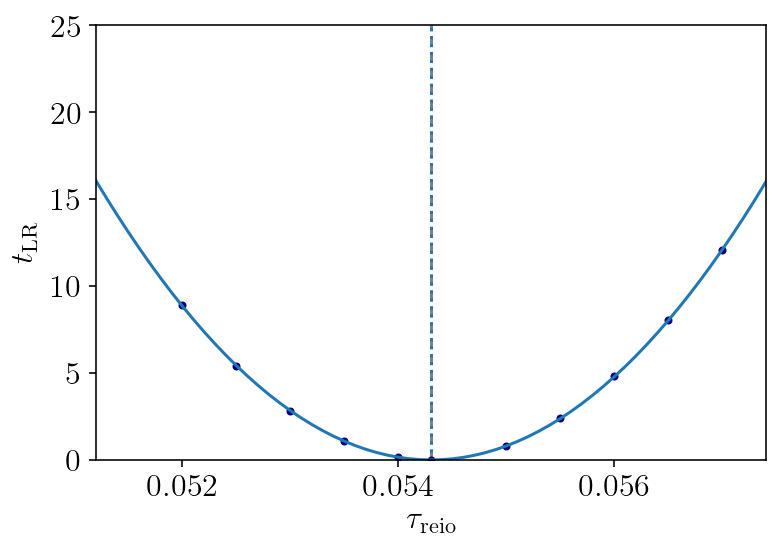

In [17]:
#### Compute Asimov error

#Fit parabola
[a,b,c], pcov = curve_fit(parab, xs_asimov, chi2_asimov, p0=[0.72, 1185714, 0.67], maxfev=30000)
fit_x = x_bins_fine
fit_y = b * (fit_x-c)**2.
parabola_min = a

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("MLE: ", c)
zeros = fsolve(parabola, x0=[0.0,5.])
sigma = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma)
sigma_asimov = sigma

# Set x_lim
x_lim = 4*sigma_asimov

# Plot
plt.plot(xs_asimov, chi2_asimov, marker=".", ls="", color="navy")
plt.plot(fit_x, fit_y, color='tab:blue', ls='-')
plt.vlines(x_true, 0, 25, color="grey", ls="--")
plt.vlines(c, 0, 25, color="tab:blue", ls=":")
plt.hlines(1, 0.65, 0.70, color="tab:blue", ls=":")
plt.ylabel(r"$t_\mathrm{LR}$")
plt.xlabel(xname)
plt.ylim([0,25])
plt.xlim([x_true-x_lim, x_true+x_lim])
plt.show()

In [18]:
# Adapt h bin settings
x_lim = 4*sigma_asimov
x_bin_width = x_lim/10.
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

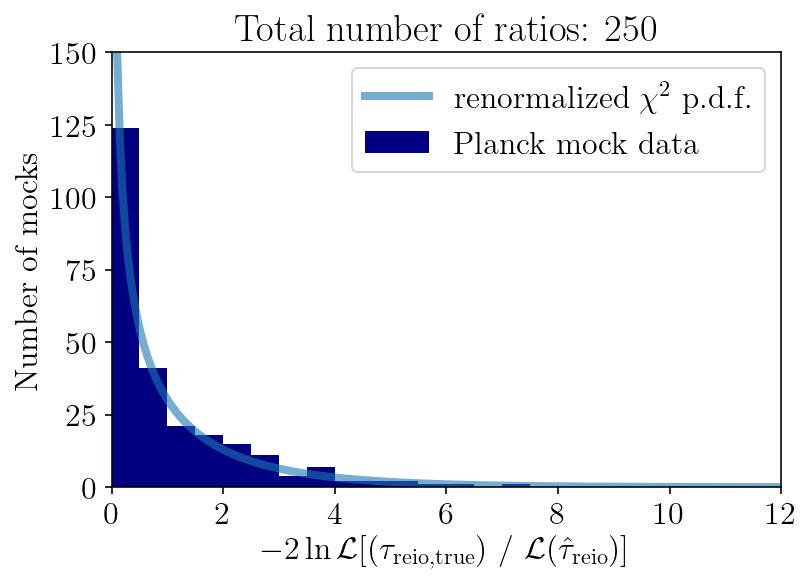

In [19]:
# Plot LR histogram
plt.hist(LR, bins=bins, color="navy", label="Planck mock data")
plt.plot(bins_fine, norm*chi2.pdf(bins_fine, df=1), color="tab:blue", lw=4, alpha=0.6, label=r'renormalized $\chi^2$ p.d.f.')
plt.xlim([0,bin_max])
plt.ylim([0,150])
plt.xlabel(r"$-2\ln\mathcal{L}$[("+xname_true+r") / {$\mathcal{L}$("+xname_hat+r")]")
plt.ylabel("Number of mocks")
plt.title("Total number of ratios: "+str(N_LR))
plt.legend()
plt.show()

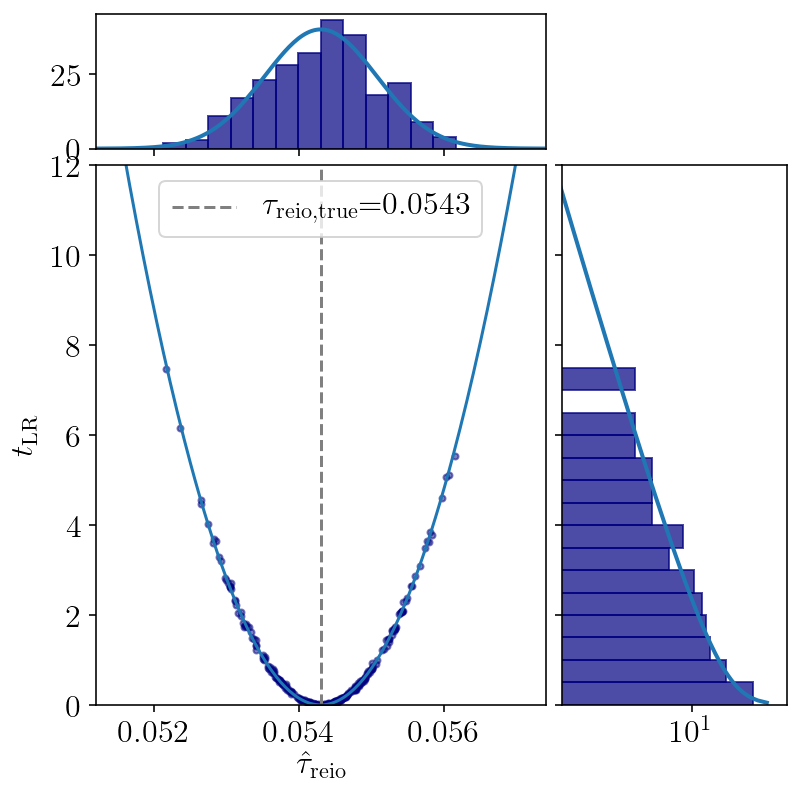

In [22]:
#### LR triangle plot
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(x_hat, LR, color="navy", marker=".", alpha=0.5)
ax.plot(x_bins_fine, (x_bins_fine-x_true)**2/sigma_asimov**2, color='tab:blue', ls='-')
ax.vlines(x_true, 0, bin_max, ls="--", color="grey", label=xname_true+r"$ = $"+str(x_true))
ax.set_xlim([x_true-x_lim, x_true+x_lim])
ax.set_ylim([0,bin_max])
ax.set_xlabel(xname_hat)
ax.set_ylabel(r"$t_\mathrm{LR}$")
ax.legend()

# Hist x
ax_histx.hist(x_hat, bins=x_bins, color="navy", alpha=0.7, edgecolor='navy')
ax_histx.plot(x_bins_fine, norm_x*Gauss.pdf(x_bins_fine, loc=x_true, scale=sigma_asimov), color='tab:blue', lw=2)

# Hist y
ax_histy.hist(LR, bins=bins, orientation='horizontal', color="navy", alpha=0.7, edgecolor='navy')
ax_histy.plot(norm*chi2.pdf(bins_fine, df=1), bins_fine, color='tab:blue', lw=2)
ax_histy.set_xlim([5e-2,5e2])
ax_histy.set_xscale("log")

plt.savefig("LR_hist_fixed_NP_tau.pdf", format="PDF")
plt.show()

In [23]:
# Find \Delta\chi^2 for which 68.27% of mocks are below
LR_cutoff = 1.065
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

68.4 % of mocks below:  1.065


In [24]:
# Compare sigma_asimov and sigma_mocks:
print("sigma_asimov: ", sigma_asimov)
print("sigma_mocks: ", np.std(x_hat))

sigma_asimov:  0.0007748323434456118
sigma_mocks:  0.0007818043186989695
